In [1]:

import functions as f
import time
from comparing import ComparatorForDatasets
from comparing import CategoricalSimilarity
from similarity.DataFrameMetadataCreator import DataFrameMetadataCreator
from similarity.DataFrameMetadata import DataFrameMetadata
from collections import defaultdict
from similarity.Comparator import Comparator

In [2]:
database, names = f.load__csv_files_from_folder("../data")

In [3]:
metadata: dict[str, DataFrameMetadata] = defaultdict()
for dataframe, name in zip(database, names):
    metadata[name] = DataFrameMetadataCreator(dataframe).create_column_embeddings().get_metadata()
    

In [5]:
import pandas as pd
from similarity.Comparator import CategoricalComparator, ColumnEmbeddingComparator

result = pd.DataFrame()

comparator = Comparator().add_comparator_type(ColumnEmbeddingComparator())
              #.add_comparator_type(CategoricalComparator()))
            # .add_comparator_type(ColumnEmbeddingComparator())
              
for name1, metad1 in  metadata.items():
    for name2, metadata2 in metadata.items():
        # if metad1 != metadata2:
        # if metad1 == metadata2:
            sim = comparator.compare(metad1, metadata2)
            result.loc[name1, name2] = sim
            # print(f"Distance between {name1} and {name2} is {sim}")
            
            

Distance between aircraft-data_nov_dec and aircraft-data_nov_dec is 0.0
Distance between aircraft-data_nov_dec and Airplane_Cleaned is 0.28132205749400213
Distance between aircraft-data_nov_dec and autoscout24-germany-dataset is 0.4448764546630501
Distance between aircraft-data_nov_dec and CARS_1 is 0.3969450426068197
Distance between aircraft-data_nov_dec and disney_movies is 0.4463474518731531
Distance between aircraft-data_nov_dec and exchange_rates is 0.2522855019280967
Distance between aircraft-data_nov_dec and imdb_top_1000 is 0.3795474392886839
Distance between aircraft-data_nov_dec and netflix_titles is 0.4180283306245473
Distance between aircraft-data_nov_dec and Sales_Transaction10000 is 0.4544917300777157
Distance between aircraft-data_nov_dec and transaction_data is 0.39054967665365775
Distance between aircraft-data_nov_dec and USA_cars_datasets is 0.4831593481116154
Distance between Airplane_Cleaned and aircraft-data_nov_dec is 0.28132205749400213
Distance between Airplane

In [9]:
import pandas as pd
from similarity.Comparator import CategoricalComparator, ColumnEmbeddingComparator

resultCat = pd.DataFrame()

comparator = Comparator().add_comparator_type(CategoricalComparator())
              
for name1, metad1 in  metadata.items():
    for name2, metadata2 in metadata.items():
            sim = comparator.compare(metad1, metadata2)
            resultCat.loc[name1, name2] = sim

In [10]:
import pandas as pd
from similarity.Comparator import CategoricalComparator, ColumnEmbeddingComparator

resultBoth = pd.DataFrame()

comparator = Comparator().add_comparator_type(ColumnEmbeddingComparator()).add_comparator_type(ColumnEmbeddingComparator())
              
for name1, metad1 in  metadata.items():
    for name2, metadata2 in metadata.items():
            sim = comparator.compare(metad1, metadata2)
            resultBoth.loc[name1, name2] = sim

<Axes: >

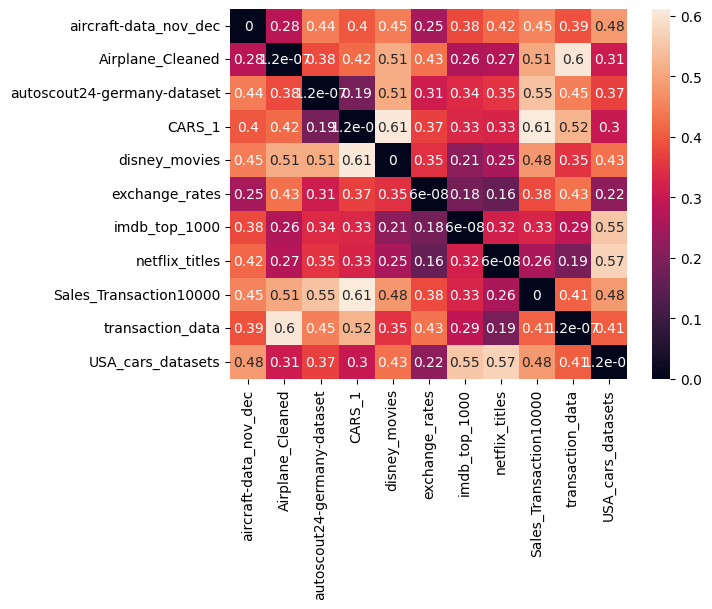

In [13]:
import seaborn as sns
sns.heatmap(result, annot=True)

<Axes: >

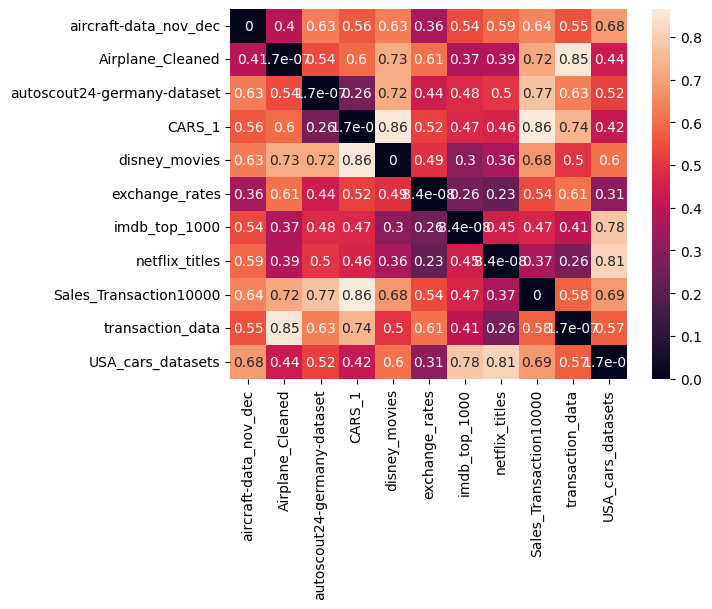

In [14]:
sns.heatmap(resultBoth, annot=True)

<Axes: >

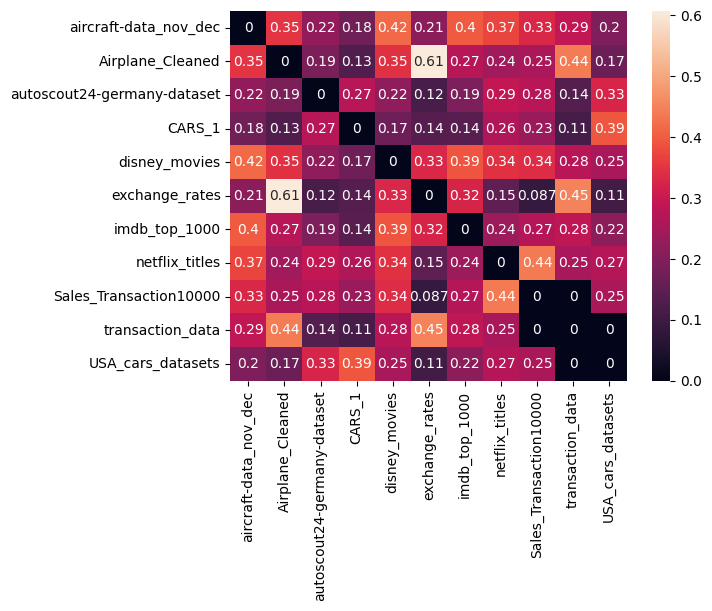

In [15]:
sns.heatmap(resultCat, annot=True)